In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [98]:
data=pd.read_csv("cars_dataset.csv",sep=",")

In [131]:
data.drop(data.index[25:], inplace=True) 
#kaggledan aldığım veriseti 760 satırlıydı 25 satıra indirdim. inplace=true güncellenmesini sağlar
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
5,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,audi
6,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,audi
7,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,audi
8,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,audi
9,A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,audi


In [132]:
#multiplelinearregresyon modeli oluşturalım
multiReg=LinearRegression()
multiReg.fit(data[["year","mileage","tax","mpg","engineSize"]],data["price"])

LinearRegression()

In [133]:
multiReg.predict([[2019,20000,120.0,53.4,1.6]])

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16858.22611697])

In [134]:
polynomail_regression=PolynomialFeatures(degree=5)
x_poly=polynomail_regression.fit_transform(data[["year","mileage","tax","mpg","engineSize"]])
polyReg=LinearRegression()
polyReg.fit(x_poly,data.price)

LinearRegression()

In [135]:
x_poly1=polynomail_regression.fit_transform([[2019,20000,120.0,53.4,1.6]])
polyReg.predict(x_poly1)

array([20644.69745049])

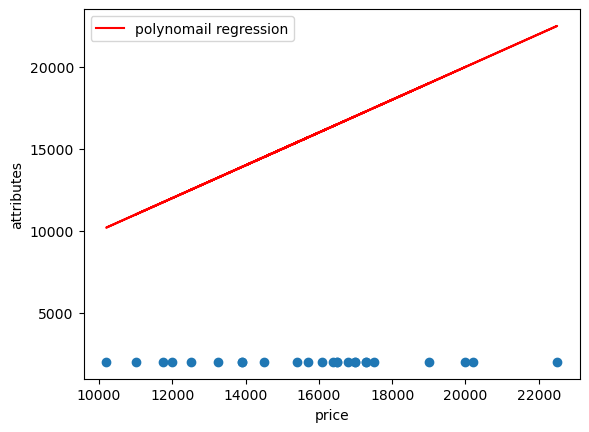

In [137]:
poly_head =polyReg.predict(x_poly) #predicti,tahmin

plt.xlabel("price")
plt.ylabel("attributes")
plt.plot(data["price"],poly_head,color="red",label="polynomail regression")
plt.scatter(data.price,data.year)
plt.legend()
plt.show()